# **Airport's sentiment analysis**

## **Import libraries**

In [ ]:
!pip install contractions
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import word cleaning libraries
import contractions
import nltk
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

#Import learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional
import pickle

#Import imbalance libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Import datas**

In [ ]:
manchester_trustpilot_df = pd.read_csv('https://raw.githubusercontent.com/ssxxnnxxtt/Thai-s-airport-review/main/data/manchester_trustpilot.csv')

neutral_range = 2
manchester_trustpilot_df["sentiment"] = 0
manchester_trustpilot_df["sentiment"].loc[(manchester_trustpilot_df["score"] > neutral_range)] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
manchester_airlinequality_df = pd.read_csv('https://raw.githubusercontent.com/ssxxnnxxtt/Thai-s-airport-review/main/data/manchester_airlinequality.csv')

neutral_range = 4
manchester_airlinequality_df["sentiment"] = 0
manchester_airlinequality_df["sentiment"].loc[(manchester_airlinequality_df["score"] > neutral_range)] = 1

In [ ]:
london_airlinequality_df = pd.read_csv('https://raw.githubusercontent.com/ssxxnnxxtt/Thai-s-airport-review/main/data/london_heathrow_airlinequality.csv')

neutral_range = 4
london_airlinequality_df["sentiment"] = 0
london_airlinequality_df["sentiment"].loc[(london_airlinequality_df["score"] > neutral_range)] = 1

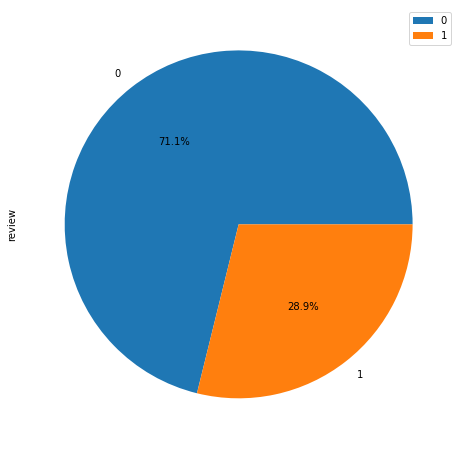

In [ ]:
frames = [manchester_trustpilot_df, manchester_airlinequality_df, london_airlinequality_df]
combind_df = pd.concat(frames)

neutral_range = 4
combind_df["sentiment"] = 0
combind_df["sentiment"].loc[(combind_df["score"] > neutral_range)] = 1
combind_df.head(10)

combind_df.groupby(['sentiment']).count().plot(kind='pie', y='review', figsize=(8,8), autopct='%1.1f%%')

In [ ]:
len(combind_df)

6031

In [ ]:
file_name = "Test.csv"

combind_df.to_csv(file_name)

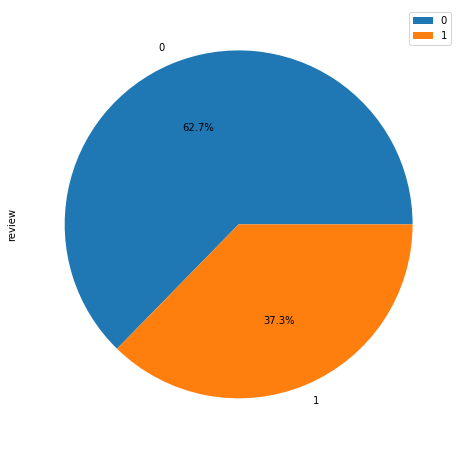

In [ ]:
thai_suvarnabhumi_df = pd.read_csv('https://raw.githubusercontent.com/ssxxnnxxtt/Thai-s-airport-review/main/data/suvarnabhumi_airlinequality.csv')

neutral_range = 4
thai_suvarnabhumi_df["sentiment"] = 0
thai_suvarnabhumi_df["sentiment"].loc[(thai_suvarnabhumi_df["score"] > neutral_range)] = 1
thai_suvarnabhumi_df.head(10)

thai_suvarnabhumi_df.groupby(['sentiment']).count().plot(kind='pie', y='review', figsize=(8,8), autopct='%1.1f%%')

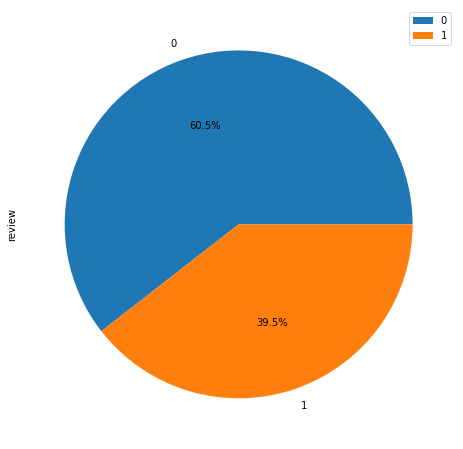

In [ ]:
thai_don_muang_df = pd.read_csv('https://raw.githubusercontent.com/ssxxnnxxtt/Thai-s-airport-review/main/data/don_muang_airlinequality.csv')

neutral_range = 4
thai_don_muang_df["sentiment"] = 0
thai_don_muang_df["sentiment"].loc[(thai_don_muang_df["score"] > neutral_range)] = 1
thai_don_muang_df.head(10)

thai_don_muang_df.groupby(['sentiment']).count().plot(kind='pie', y='review', figsize=(8,8), autopct='%1.1f%%')

## **Clean datas**

In [ ]:
url = '/content/Test.csv'
combind_df = pd.read_csv(url)

In [ ]:
nltk.download('punkt')

nltk.download('stopwords')
stops = set(stopwords.words('english'))

def clearStopwords(sentence):
    words = word_tokenize(sentence)

    wordsFiltered = []

    for w in words:
        if w not in stops:
            wordsFiltered.append(w)

    return ' '.join(wordsFiltered)

def clean_data(dataframe):
    dataframe['review_expand'] = dataframe.apply(lambda row:contractions.fix(row['review']), axis=1)
    del dataframe['review']

    #Delete stopwords
    dataframe['review_clear'] = dataframe['review_expand'].map(lambda x: clearStopwords(x))

    #Delete punctuation
    dataframe['review_punctuation'] = dataframe.apply(lambda row:(row['review_clear']).translate(str.maketrans('', '', string.punctuation)), axis=1)
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.lower()
    dataframe['review_punctuation'] = dataframe.apply(lambda row:' '.join((row['review_punctuation']).split()), axis=1)

    #Delete words
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('manchester', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('liverpool', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('london', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('birmingham', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('england', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('europe', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('euro', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('eur', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('asia', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('thai', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('thailand', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('suvarnabhumi', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('donmuang', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('don', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('muang', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('bangkok', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('pattaya', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('bkk', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('uk', '')
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.replace('“', '')

    translation_table = str.maketrans('', '', string.digits)
    dataframe['review_punctuation'] = dataframe['review_punctuation'].str.translate(translation_table)

    #Delete stopwords (round 2)
    dataframe['review_punctuation'] = dataframe['review_punctuation'].map(lambda x: clearStopwords(x))

    return dataframe

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
combind_clean_df = clean_data(combind_df)

In [ ]:
combind_clean_df.head(10)

,Unnamed: 0,Unnamed: 0.1,score,sentiment,review_expand,review_clear,review_punctuation
0,0,0,1.0,0,Horrible experience. Meet and greet parking - ...,Horrible experience . Meet greet parking - man...,horrible experience meet greet parking man poi...
1,1,1,1.0,0,Extremely rude staff at baggage check. Unhelpf...,Extremely rude staff baggage check . Unhelpful...,extremely rude staff baggage check unhelpful s...
2,2,2,1.0,0,"Utterly, totally clueless at security. Putting...","Utterly , totally clueless security . Putting ...",utterly totally clueless security putting tray...
3,3,3,1.0,0,Have collected family from Manchester airport ...,Have collected family Manchester airport 3 tim...,collected family airport times year every time...
4,4,4,1.0,0,"What a truely, grotty depressing place. Ripped...","What truely , grotty depressing place . Ripped...",truely grotty depressing place ripped seats ev...
5,5,5,1.0,0,I went to pickup from T3 today. Trying to get ...,I went pickup T3 today . Trying get pickup are...,went pickup today trying get pickup area night...
6,6,6,1.0,0,Just returned home from a trip to Europe. Flew...,Just returned home trip Europe . Flew many air...,returned home trip flew many airports stood wo...
7,7,7,1.0,0,The charges for being dropped off and collecte...,The charges dropped collected shocking . Absol...,charges dropped collected shocking absolute ri...
8,8,8,1.0,0,Manchester airport is a shambles. Security was...,Manchester airport shambles . Security long pa...,airport shambles security long painful staff i...
9,9,9,1.0,0,This airport is possibly the worst in the worl...,This airport possibly worst world . Absolutely...,airport possibly worst world absolutely misera...


In [ ]:
del combind_clean_df['Unnamed: 0']
del combind_clean_df['Unnamed: 0.1']

In [ ]:
thai_suvarnabhumi_df = clean_data(thai_suvarnabhumi_df)
thai_don_muang_df = clean_data(thai_don_muang_df)

del thai_suvarnabhumi_df['Unnamed: 0']
del thai_don_muang_df['Unnamed: 0']

In [ ]:
nltk.download('omw-1.4')

def lemmaWords(words):
    lst = []
    lemmatiser = WordNetLemmatizer()
    for word in words:
        lst.append(lemmatiser.lemmatize(word, pos='v'))
    return lst

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
combind_clean_df['review_token'] = combind_clean_df.apply(lambda row: nltk.word_tokenize(row['review_punctuation']), axis=1)
combind_clean_df['review_token'] = combind_clean_df['review_token'].map(lambda x: lemmaWords(x))
del combind_clean_df["review_expand"]
del combind_clean_df["review_clear"]
del combind_clean_df["review_punctuation"]

In [ ]:
thai_suvarnabhumi_df['review_token'] = thai_suvarnabhumi_df.apply(lambda row: nltk.word_tokenize(row['review_punctuation']), axis=1)
thai_suvarnabhumi_df['review_token'] = thai_suvarnabhumi_df['review_token'].map(lambda x: lemmaWords(x))

del thai_suvarnabhumi_df["review_expand"]
del thai_suvarnabhumi_df["review_clear"]
del thai_suvarnabhumi_df["review_punctuation"]

In [ ]:
thai_don_muang_df['review_token'] = thai_don_muang_df.apply(lambda row: nltk.word_tokenize(row['review_punctuation']), axis=1)
thai_don_muang_df['review_token'] = thai_don_muang_df['review_token'].map(lambda x: lemmaWords(x))

del thai_don_muang_df["review_expand"]
del thai_don_muang_df["review_clear"]
del thai_don_muang_df["review_punctuation"]

In [ ]:
combind_data = combind_clean_df.to_numpy()

In [ ]:
thai_suvarnabhumi_data = thai_suvarnabhumi_df.to_numpy()

In [ ]:
thai_don_muang_data = thai_don_muang_df.to_numpy()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combind_data[:,2])

In [ ]:
len(tokenizer.index_word)

11520

In [ ]:
combind_tts = tokenizer.texts_to_sequences(combind_data[:,2])
thai_suvarnabhumi_tts = tokenizer.texts_to_sequences(thai_suvarnabhumi_data[:,2])
thai_don_muang_tts = tokenizer.texts_to_sequences(thai_don_muang_data[:,2])
maxlen = max([len(s) for s in combind_tts])

In [ ]:
def get_tokenizer(tts, data):
    x = pad_sequences(tts, maxlen=maxlen, padding="post")
    y = to_categorical([ int(i) for i in data[:,1]])
    return x, y

In [ ]:
combind_x, combind_y = get_tokenizer(combind_tts, combind_data)
thai_suvarnabhumi_x, thai_suvarnabhumi_y = get_tokenizer(thai_suvarnabhumi_tts, thai_suvarnabhumi_data)
thai_don_muang_x, thai_don_muang_y = get_tokenizer(thai_don_muang_tts, thai_don_muang_data)

## **Train data with LSTM**

### How to learning data with LSTM

In [ ]:
vocab_size = len(tokenizer.word_index) +1

# Fix Random Weight
# For reproducable
np.random.seed(50)

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=10,
                    input_length=maxlen))

model.add(Bidirectional(LSTM(16)))

model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history1 = model.fit(combind_x,combind_y, epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 375, 10)           115210    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               3456      
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
Total params: 118,773
Trainable params: 118,773
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
189/189 [==============================] - 47s 206ms/step - loss: 0.5651 - accuracy: 0.7151
Epoch 2/50
18

### Test with training data (Manchester & London)

In [ ]:
combind_y_predict = model.predict(combind_x)

combind_y_true = [np.argmax(i) for i in combind_y]
combind_y_predict = [np.argmax(i) for i in combind_y_predict]
cm = confusion_matrix(combind_y_true, combind_y_predict)

189/189 [==============================] - 8s 37ms/step


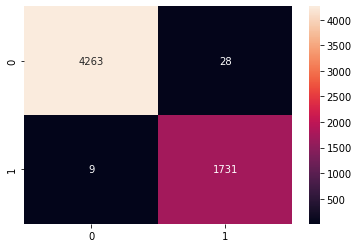

In [ ]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [ ]:
accuracy_score(combind_y_true, combind_y_predict)

0.9938650306748467

### Test with testing data (Suvarnabhumi)

In [ ]:
thai_suvarnabhumi_y_predict = model.predict(thai_suvarnabhumi_x)

thai_suvarnabhumi_y_true = [np.argmax(i) for i in thai_suvarnabhumi_y]
thai_suvarnabhumi_y_predict = [np.argmax(i) for i in thai_suvarnabhumi_y_predict]
cm = confusion_matrix(thai_suvarnabhumi_y_true, thai_suvarnabhumi_y_predict)

14/14 [==============================] - 1s 37ms/step


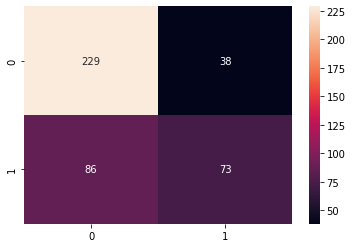

In [ ]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [ ]:
accuracy_score(thai_suvarnabhumi_y_true, thai_suvarnabhumi_y_predict)

0.7089201877934272

### Test with testing data (Don Muang)

In [ ]:
thai_don_muang_y_predict = model.predict(thai_don_muang_x)

thai_don_muang_y_true = [np.argmax(i) for i in thai_don_muang_y]
thai_don_muang_y_predict = [np.argmax(i) for i in thai_don_muang_y_predict]
cm = confusion_matrix(thai_don_muang_y_true, thai_don_muang_y_predict)

4/4 [==============================] - 0s 34ms/step


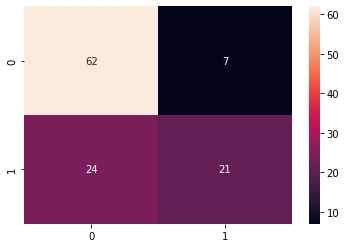

In [ ]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [ ]:
accuracy_score(thai_don_muang_y_true, thai_don_muang_y_predict)

0.7280701754385965

## **Solve problem of imbalance data**

### Use imblearn library to solve imbalance data with SMOTE technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

In [ ]:
def count_class(nums):
    class_zero = np.array([1, 0])
    count_zero = int((class_zero == nums).sum()/2)

    class_one = np.array([0, 1])
    count_one = int((class_one == nums).sum()/2)

    print(f'0: {count_zero}, 1: {count_one}')     

In [ ]:
count_class(combind_y)

0: 4291, 1: 1740


In [ ]:
ROS = RandomOverSampler(random_state=125, sampling_strategy=1)

In [ ]:
x, y_sub = ROS.fit_resample(combind_x, combind_y)

In [ ]:
y_sub

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y = []

for i in range(len(y_sub)):
    if y_sub[i] == np.array([0]):
        y.append([1, 0])
    else:
        y.append([0, 1])

In [ ]:
y = np.array(y)

In [ ]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
x, y = shuffle(x, y, random_state=500)

In [ ]:
count_class(y)

0: 4291, 1: 4291


### Learn again with LSTM

In [ ]:
#LSTM
vocab_size = len(tokenizer.word_index) +1

np.random.seed(300)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size,
                    output_dim=10,
                    input_length=maxlen))

lstm_model.add(Bidirectional(LSTM(16)))

lstm_model.add(Dense(3, activation='relu'))
lstm_model.add(Dense(2, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

history1 = lstm_model.fit(x,y, epochs=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 375, 10)           115210    
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               3456      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 118,773
Trainable params: 118,773
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
269/269 [==============================] - 60s 206ms/step - loss: 0.4737 - accuracy: 0.7699
Epoch 2/50


### Test with training data (Manchester & London)

In [ ]:
y_predict = lstm_model.predict(x)

y_true = [np.argmax(i) for i in y]
y_predict = [np.argmax(i) for i in y_predict]
cm = confusion_matrix(y_true, y_predict)

269/269 [==============================] - 10s 39ms/step


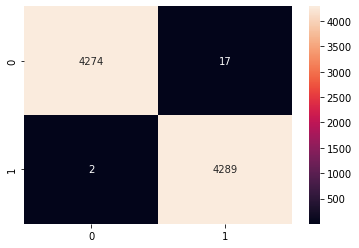

In [ ]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [ ]:
print("Accuracy of training data is {:.2f}%".format(accuracy_score(y_true, y_predict)*100))

Accuracy of training data is 99.78%


### Test with tesing data (Suvarnabhumi)

In [ ]:
thai_suvarnabhumi_y_predict = lstm_model.predict(thai_suvarnabhumi_x)

thai_suvarnabhumi_y_true = [np.argmax(i) for i in thai_suvarnabhumi_y]
thai_suvarnabhumi_y_predict = [np.argmax(i) for i in thai_suvarnabhumi_y_predict]
thai_suvarnabhumi_cm = confusion_matrix(thai_suvarnabhumi_y_true, thai_suvarnabhumi_y_predict)

14/14 [==============================] - 1s 38ms/step


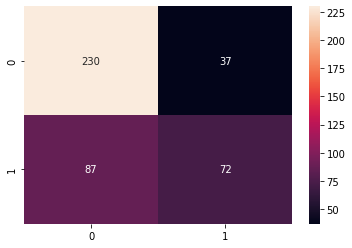

In [ ]:
sns.heatmap(thai_suvarnabhumi_cm, annot=True, fmt=".0f")

In [ ]:
print("Accuracy of Suvarnabhumi is {:.2f}%".format(accuracy_score(thai_suvarnabhumi_y_true, thai_suvarnabhumi_y_predict)*100))

Accuracy of Suvarnabhumi is 70.89%


### Test with tesing data (Don muang)

In [ ]:
thai_don_muang_y_predict = lstm_model.predict(thai_don_muang_x)

thai_don_muang_y_true = [np.argmax(i) for i in thai_don_muang_y]
thai_don_muang_y_predict = [np.argmax(i) for i in thai_don_muang_y_predict]
thai_don_muang_cm = confusion_matrix(thai_don_muang_y_true, thai_don_muang_y_predict)

4/4 [==============================] - 0s 35ms/step


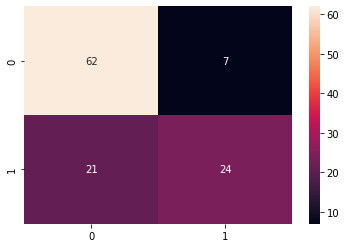

In [ ]:
sns.heatmap(thai_don_muang_cm, annot=True, fmt=".0f")

In [ ]:
print("Accuracy of Don Muang is {:.2f}%".format(accuracy_score(thai_don_muang_y_true, thai_don_muang_y_predict)*100))

Accuracy of Suvarnabhumi is 75.44%


In [ ]:
pickle.dump(lstm_model, open('lstm2.sav', 'wb'))

## **Visualize answer**

### Answer of airport

In [ ]:
thai_suvarnabhumi_neg = thai_suvarnabhumi_cm[0][0]
thai_suvarnabhumi_pos = thai_suvarnabhumi_cm[1][1]

thai_don_muang_neg = thai_don_muang_cm[0][0]
thai_don_muang_pos = thai_don_muang_cm[1][1]

thai_suvarnabhumi_answers = thai_suvarnabhumi_pos + thai_suvarnabhumi_neg
thai_don_muang_answers = thai_don_muang_pos + thai_don_muang_neg

d = {"airport":["Suvarnabhumi (70.89%)", "Don Muang (75.44%)"] ,"Positive": [thai_suvarnabhumi_pos, thai_don_muang_pos], "Negative": [thai_suvarnabhumi_neg, thai_don_muang_neg]}

summary_df = pd.DataFrame(d)
summary_df.set_index('airport', inplace=True)

In [ ]:
summary_df

,Positive,Negative
airport,,
Suvarnabhumi (70.89%),72,230
Don Muang (75.44%),24,62


### Normalization

In [ ]:
d = {"airport":["Suvarnabhumi (70.89%)", "Don Muang (75.44%)"] ,"Positive": [thai_suvarnabhumi_pos/thai_suvarnabhumi_answers, thai_don_muang_pos/thai_don_muang_answers], "Negative": [thai_suvarnabhumi_neg/thai_suvarnabhumi_answers, thai_don_muang_neg/thai_don_muang_answers]}

normalize_df = pd.DataFrame(d)
normalize_df.set_index('airport', inplace=True)

In [ ]:
normalize_df

,Positive,Negative
airport,,
Suvarnabhumi (70.89%),0.238411,0.761589
Don Muang (75.44%),0.279070,0.720930


### Plot graph

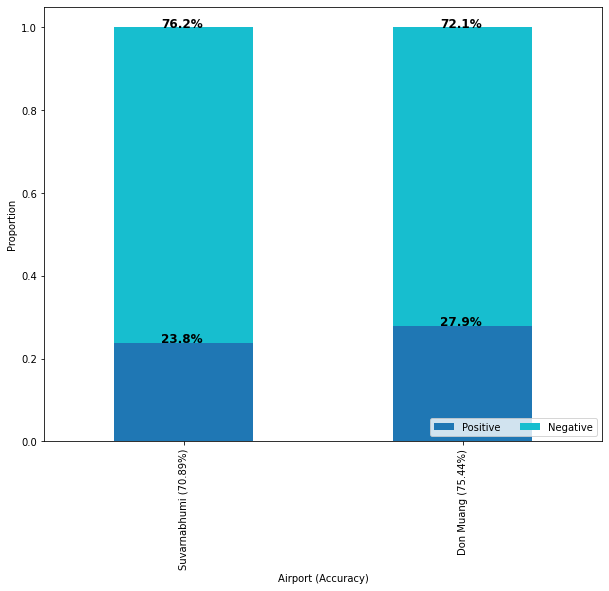

In [ ]:
normalize_df.plot(kind='bar', stacked=True, cmap='tab10', figsize=(10, 8))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Airport (Accuracy)")
plt.ylabel("Proportion")

for n, x in enumerate([*normalize_df.index.values]):
    for (proportion, y_loc) in zip(normalize_df.loc[x],
                                   normalize_df.loc[x].cumsum()):
                
        plt.text(x=n-0.08,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()